In [1]:
import networkx as nx, matplotlib.pyplot as plt
import numpy as np, pandas as pd
import math, seaborn as sns
from scipy import stats

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/Data1.csv')

In [3]:
GT = nx.Graph()
GT.add_nodes_from(df['character'].tolist(),bipartite=1,node_color='w',alpha=0.4,node_shape='d')

In [4]:
GT.add_nodes_from(df['title'].tolist(),bipartite=0,  node_color='red', alpha=0.4, node_shape='s')
for i in range(len(df.index)):
    GT.add_edge(df.at[i,'title'],df.at[i,'character'])

In [5]:
character_nodes = {n for n, d in GT.nodes(data=True) if d['bipartite'] == 1}
title_nodes = set(GT) - character_nodes   


In [6]:
len(character_nodes) # number of characters

732

In [7]:
len(title_nodes) # titles count

60

In [8]:
len(GT.edges)

1142

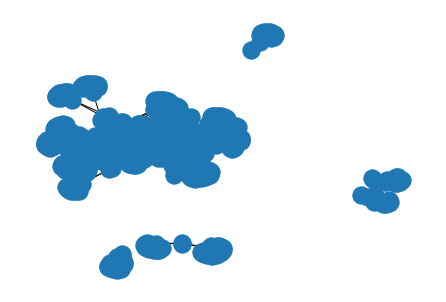

In [9]:
#pos = nx.spring_layout(GT)
#nx.draw(GT)
pos = nx.spring_layout(GT)
nx.draw(GT)#,pos,with_labels=True,font_color='red')

In [10]:
list(GT.neighbors('Tony Stark'))
#List of Marvel movies Tony Stark acted

['Iron Man',
 'Iron Man 2',
 'The Avengers',
 'Iron Man 3',
 'Avengers: Age of Ultron',
 'Captain America: Civil War',
 'Spider-Man: Homecoming',
 'Avengers: Infinity War',
 'Avengers: Endgame']

In [11]:
list(GT.neighbors('Avengers: Age of Ultron'))
#Main characters in the Avengers: Age of Ultron

['Tony Stark',
 'Thor',
 'Bruce Banner',
 'Steve Rogers',
 'Natasha Romanoff',
 'Clint Barton',
 'Ultron',
 'Nick Fury',
 'James Rhodes',
 'Pietro Maximoff',
 'Wanda Maximoff',
 'Jarvis',
 'Maria Hill',
 'Sam Wilson',
 'Heimdall',
 'Laura Barton',
 'Erik Selvig',
 'Dr. Helen Cho',
 'Strucker',
 'Ulysses Klaue',
 'Friday']

In [12]:
# To find the Similarities between the nodes
def Jaccard_Cosine_Smlrty(G,l):
    num = list(set([n for n in G.neighbors(l[0])]) & set([m for m in G.neighbors(l[1])]))
    print('Common between the',l[0],'and', l[1],'are', num)
    denom_j = list(set([n for n in G.neighbors(l[0])] + [m for m in G.neighbors(l[1])]))
    print('Jaccard Similarity is ', len(num)/len(denom_j))
    denom_c = math.sqrt(len([n for n in G.neighbors(l[0])])*len([n for n in G.neighbors(l[1])]))
    print('Cosine Similarity is', len(num)/denom_c)

In [13]:
l = ['Tony Stark','Steve Rogers']
Jaccard_Cosine_Smlrty(GT,l)

Common between the Tony Stark and Steve Rogers are ['Avengers: Infinity War', 'Avengers: Age of Ultron', 'Captain America: Civil War', 'Avengers: Endgame', 'The Avengers']
Jaccard Similarity is  0.4166666666666667
Cosine Similarity is 0.5892556509887896


In [14]:
l2= ['Avengers: Age of Ultron', 'Avengers: Endgame']
Jaccard_Cosine_Smlrty(GT,l2)

Common between the Avengers: Age of Ultron and Avengers: Endgame are ['Sam Wilson', 'Steve Rogers', 'James Rhodes', 'Clint Barton', 'Laura Barton', 'Wanda Maximoff', 'Bruce Banner', 'Tony Stark', 'Jarvis', 'Natasha Romanoff', 'Friday', 'Thor', 'Maria Hill', 'Nick Fury']
Jaccard Similarity is  0.2028985507246377
Cosine Similarity is 0.3879917968315853


### Isolated Components

In [15]:
# isolated components
i= nx.number_connected_components(GT)
i

6

In [16]:
[GT.subgraph(c).copy() for c in nx.connected_components(GT)]

In [17]:
for c in nx.connected_components(GT):
    print(c)

{'Dennis the Mailman', 'Master Hamir', 'Steve Rogers', 'James Rhodes', 'Daniel Sousa', 'Detective Costa', 'Griffin Sinclair', 'Dr. Stephen Strange', 'Dwayne Blaskowski', 'Lila Barton', 'Doctor Strange in the Multiverse of Madness', 'Agents of S.H.I.E.L.D.: Slingshot', 'Iwua', 'Ghost Rider', 'Hai-Qing Yang', 'Sheikh Abdullah', 'Cull Obsidian', 'Wong', 'Erik Killmonger', 'Iron Man 3', "T'Chaka", 'Fletcher Heggs', 'Liz', 'Guterman', 'Wanda Maximoff', 'Thor: Love and Thunder', 'Hernan Alvarez', 'Amalia Chavez', 'Dorothy', 'Mike Peterson', 'Colonel Victor Ramon', 'Master Guang Bo', 'MIT Assistant Vice Chancellor', 'Malekith', 'Andrew Garner', 'Carlos', 'Herman', 'Captain Marvel', 'Jemma Simmons', 'Carlo Eastman', 'Harold Meachum', 'Eugene Patilio', 'Major Allen', 'Black Widow', 'Agent Fisher', 'JARVIS', 'Heinz Kruger', 'Flint', 'Peter Parker3', 'David Lieberman', 'Thor: The Dark World', 'Jessica Jones', 'Mama Donya', 'Topaz', 'Alpha Dog', 'Zaya Okonjo', 'Ned', 'Joseph Manfredi', 'Doctor Str

### 6 Clusters are 
#### 1 - Werewolf by Night
#### 2 - Moon Knight
#### 3 - Eternals
#### 4 - Helstrom
#### 5 - Cloak & Dagger' & Runaways 
#### 6 - WHIH News Front, The Falcon and the Winter Soldier, Guardians of the Galaxy Vol. 2, Marvel One-Shot: The Consultant, Doctor Strange, Iron Man, Thor, The Avengers, Daredevil, The Incredible Hulk, Avengers: Endgame, Thor: Love and Thunder, Avengers: Age of Ultron, Iron Man 2, Marvel One-Shot: All Hail the King, Hawkeye, The Defenders, Marvel One-Shot: A Funny Thing Happened on the Way to Thor's Hammer, Doctor Strange in the Multiverse of Madness, Iron Fist, WandaVision, Peter's To-Do List, Captain America: The First Avenger, Guardians of the Galaxy, What If...?, Secret Invasion, Black Panther, Thor: Ragnarok, She-Hulk: Attorney at Law, Agents of S.H.I.E.L.D.: Slingshot, Captain America: Civil War, The Punisher, Luke Cage, Spider-Man: Far from Home, Captain Marvel, Iron Man 3, Inhumans, Loki, Jessica Jones, Agent Carter, Agents of S.H.I.E.L.D., Marvel One-Shot: Item 47, Spider-Man: No Way Home, I Am Groot, Marvel One-Shot: Agent Carter, Ant-Man, Shang-Chi and the Legend of the Ten Rings, Thor: The Dark World, Captain America: The Winter Soldier, Ms. Marvel,cAnt-Man and the Wasp, Black Widow, Avengers: Infinity War, Spider-Man: Homecoming



In [18]:
nx.node_connected_component(GT,'Werewolf by Night')

{'Azarel',
 'Barasso',
 'Billy Swan',
 'Elsa Bloodstone',
 'Jack Russell',
 'Jovan',
 'Liorn',
 'Ted (The Man-Thing)',
 'The Flaming Tuba',
 'Ulysses Bloodstone',
 'Verussa',
 'Werewolf by Night'}

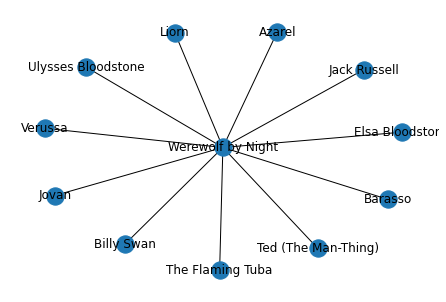

In [19]:
#Isolated Network of Werewolf team 
G_Werewolf = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Werewolf by Night'):G_Werewolf.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_Werewolf,with_labels=True, font_color='black')

In [20]:
nx.node_connected_component(GT,"Eternals")

{'Ajak',
 'Arishem',
 'Ben',
 'Dane Whitman',
 'Druig',
 'Eros',
 'Eternals',
 'Gilgamesh',
 'Ikaris',
 'Jack',
 'Karun',
 'Kingo',
 'Kro',
 'Makkari',
 'Phastos',
 'Sersi',
 'Sprite',
 'Thena'}

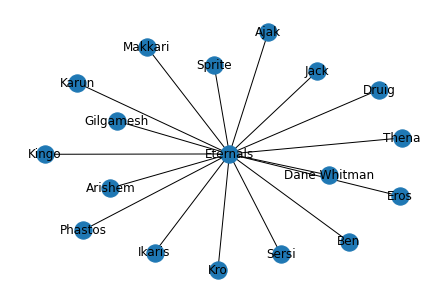

In [21]:
#Isolated Network of Eternals team 
G_Eternals = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Eternals'):G_Eternals.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_Eternals,with_labels=True, font_color='black')

In [22]:
nx.node_connected_component(GT,"Moon Knight")

{'Anton Mogart',
 'Arthur Harrow',
 'Bek',
 'Billy',
 'Bobbi',
 'Crawley',
 'Donna',
 'J.B.',
 'Khonshu',
 'Layla El-Faouly',
 'Marc Spector',
 'Moon Knight',
 'Selim',
 'Taweret',
 'Wendy Spector',
 'Yatzil'}

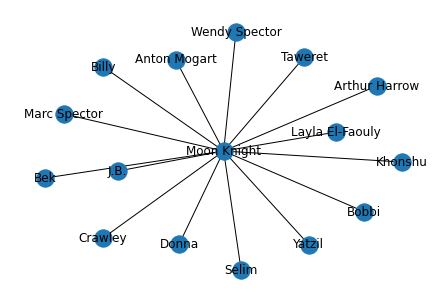

In [23]:
G_Moon_Knight = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Moon Knight'):G_Moon_Knight.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_Moon_Knight,with_labels=True, font_color='black')

In [24]:
nx.node_connected_component(GT,"Helstrom")

{'Alex Tilden',
 'Ana Helstrom',
 'Archbishop Terrazi',
 'Aubree Richards',
 'Bryce',
 'Cameron Tate',
 'Chris Yen',
 'Daimon Helstrom',
 'Dr. Louise Hastings',
 'Ellis',
 'Esther',
 'Father Joshua Crow',
 'Finn',
 'Gabriella Rosetti',
 'Helstrom',
 'Jolene Spivey',
 'Keith Spivey',
 'Kthara',
 'Lee',
 'Officer Derrick Jackson',
 'Papa',
 'Victoria Helstrom'}

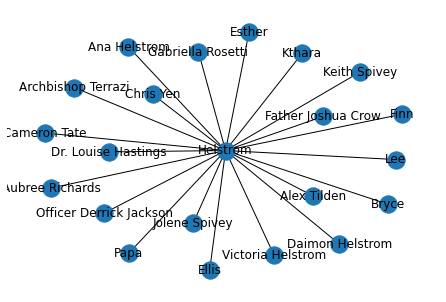

In [25]:
G_Helstrom = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Helstrom'):G_Helstrom.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_Helstrom,with_labels=True, font_color='black')

In [26]:
nx.node_connected_component(GT,'Cloak & Dagger')
# 'Runaways' or 'Cloak & Dagger' titles are in same cluster

{'Adina Johnson',
 'Alex Wilder',
 'Amy Minoru',
 'Andre Deschaine',
 "Anthony 'AWOL' Wall",
 'Auntie Chantelle',
 'Aura',
 'Bronwyn',
 'Catherine Wilder',
 'Chase Stein',
 'Choo Choo Broussard',
 'Cloak',
 'Cloak & Dagger',
 'Dagger',
 'Dale Yorkes',
 'Darius',
 'Destiny Gonzalez',
 "Detective Brigid O'Reilly",
 'Detective Connors',
 'Detective Flores',
 'Duane Porter',
 'Eiffel',
 'Evita Fusilier',
 'Frances',
 'Frank Dean',
 'Geoffrey Wilder',
 'Gert Yorkes',
 'Graciela Aguirre',
 'Ivan Hess',
 'Janet Stein',
 'Jonah',
 'Karolina Dean',
 'Leslie Dean',
 'Lia',
 'Liam Walsh',
 'Livvie',
 'Melissa Bowen',
 'Mikayla Bell',
 'Mike on a Bike',
 'Millennial Megan',
 'Mina Hess',
 'Molly Hernandez',
 'Morgan le Fay',
 'Nathan Bowen',
 'Nico Minoru',
 'Officer Fuchs',
 'Otis Johnson',
 'Peter Scarborough',
 'Robert Minoru',
 'Runaways',
 'Solomon',
 'Stacey Yorkes',
 'Susan Ellerh',
 'Tamar',
 'Tina Minoru',
 'Topher',
 'Vaughn',
 'Victor Stein',
 'Xavin'}

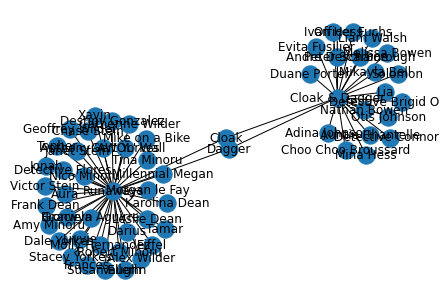

In [27]:
G_CDR = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Cloak & Dagger' or df.at[i,'title'] == 'Runaways'):
        G_CDR.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_CDR,with_labels=True, font_color='black')

### Parameters

In [28]:
def deg_dst(G7): # degree distribution of titles and characters
    degrees = [G7.degree(n) for n in title_nodes]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'title degree distribution')
    plt.legend()
    plt.show()
    degrees1 = [G7.degree(n) for n in character_nodes]
    deg1,freq1 = np.unique(degrees1,return_counts=True)
    plt.plot(deg1,freq1,label = 'characters degree distribution')
    plt.legend()
    plt.show()
def avg_deg_cc(G): # average degree and clustering co-efficient
    avg_cc_G = nx.transitivity(G)
    avg_deg_G = G.degree()
    deg_sum_G =0
    for j in list(avg_deg_G):
        deg_sum_G += j[1]
    avg_deg_G =  deg_sum_G/len(G.nodes())
    return (avg_deg_G, avg_cc_G)

In [29]:
def deg_dst_Graph(G7):
    degrees = [G7.degree(n) for n in G7.nodes()]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'Total nodes degree distribution')
    plt.legend()
    plt.show()

In [30]:
avg_deg_, avg_clstrng_ = avg_deg_cc(GT) 
#print('Average degree of Network', avg_deg_,'clustering co-efficient', avg_clstrng_)

In [31]:
num = 0 
for c in nx.connected_components(GT):
    num += nx.average_shortest_path_length(GT.subgraph(c))*len(GT.subgraph(c))

In [32]:
GT_avg_path = num/len(GT.nodes())

In [33]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)

MU Network 
 
Average degree 2.8838383838383836
Average path 5.13349020428632
Average clusteirng 0.006338148803745789


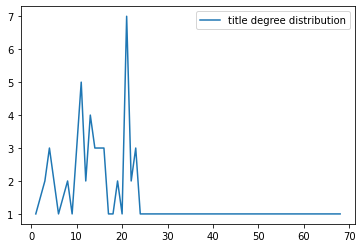

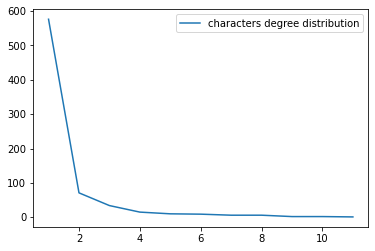

In [34]:
deg_dst(GT)

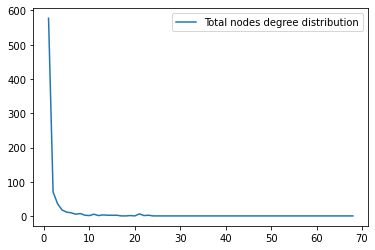

In [35]:
deg_dst_Graph(GT)

In [36]:
#des = [GT.degree(n) for n in title_nodes]
titles_dict ={}
characters_dict={}
for n in title_nodes: 
    titles_dict.update({n:GT.degree(n)})
for n in character_nodes:
    characters_dict.update({n:GT.degree(n)})  
#list(des)

In [37]:
#Degrees of Titles and characters
print('Chracters degree',characters_dict)
print('\n titles degree',titles_dict)

Chracters degree {'Dennis the Mailman': 1, 'Billy Swan': 1, 'Marc Spector': 1, 'Master Hamir': 1, 'Steve Rogers': 8, 'James Rhodes': 10, 'Daniel Sousa': 2, 'Detective Costa': 1, 'The Flaming Tuba': 1, 'Griffin Sinclair': 1, 'Dr. Stephen Strange': 7, 'Dwayne Blaskowski': 1, 'Lila Barton': 2, 'Hai-Qing Yang': 1, 'Iwua': 1, 'Ghost Rider': 1, 'Mike on a Bike': 1, 'Bryce': 1, 'Sheikh Abdullah': 1, 'Cull Obsidian': 1, 'Wong': 7, 'Erik Killmonger': 2, "T'Chaka": 2, 'Fletcher Heggs': 1, 'Liz': 1, 'Guterman': 1, 'Wanda Maximoff': 6, 'Amy Minoru': 1, 'Hernan Alvarez': 1, 'Amalia Chavez': 1, 'Ikaris': 1, 'Dorothy': 1, 'Mike Peterson': 1, 'Colonel Victor Ramon': 1, 'Master Guang Bo': 1, 'MIT Assistant Vice Chancellor': 1, 'Malekith': 1, 'Tamar': 1, 'Andrew Garner': 1, 'Carlos': 1, 'Herman': 1, 'Jemma Simmons': 2, 'Carlo Eastman': 1, 'Victoria Helstrom': 1, 'Harold Meachum': 1, 'Major Allen': 1, 'Nico Minoru': 1, 'Catherine Wilder': 1, 'Eugene Patilio': 1, 'Agent Fisher': 1, 'JARVIS': 5, 'Heinz Kru

### Random Simlated graph

In [38]:
GT_p = avg_deg_ /(len(GT.nodes())-1) # caliculating probability
GT_nodes=len(GT.nodes())
print('Random model probability value',GT_p, 'and length of nodes', GT_nodes)

Random model probability value 0.003645813380326654 and length of nodes 792


In [39]:
GT_sim_rndm = nx.gnp_random_graph(GT_nodes, GT_p)

In [40]:
# Simulated Random 
avg_deg_sim, avg_clstrng_sim =  avg_deg_cc(GT_sim_rndm)

#### Isoloated graphs in network

In [41]:
i= nx.number_connected_components(GT_sim_rndm)
i

56

In [42]:
num = 0 
for c in nx.connected_components(GT_sim_rndm):
    num += nx.average_shortest_path_length(GT_sim_rndm.subgraph(c))*len(GT_sim_rndm.subgraph(c))
GT_sim_avg_path = num/len(GT_sim_rndm.nodes())

In [43]:
print("Random Simulated MU Network \n ")
print("Average degree" ,avg_deg_sim)
print("Average path", GT_sim_avg_path)
print("Average clusteirng", avg_clstrng_sim)


Random Simulated MU Network 
 
Average degree 2.7853535353535355
Average path 5.915950601909506
Average clusteirng 0.005928853754940711


In [44]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)


MU Network 
 
Average degree 2.8838383838383836
Average path 5.13349020428632
Average clusteirng 0.006338148803745789


In [45]:
val1= GT_sim_avg_path/GT_avg_path
print(' Average path of Random Model Graph is ',val1,'times the average path of Marvel Uuniverse')
val2 =  avg_clstrng_sim/avg_clstrng_
print('Clustering co-efficient of Random graph is',val2,'times the Clustering co-efficient of Marvel Uuniverse')

 Average path of Random Model Graph is  1.1524226922591287 times the average path of Marvel Uuniverse
Clustering co-efficient of Random graph is 0.9354235658583484 times the Clustering co-efficient of Marvel Uuniverse


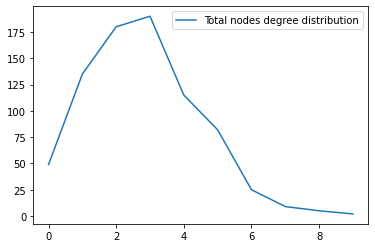

In [46]:
deg_dst_Graph(GT_sim_rndm)

### Preferential Algorithm Method

#### Connecting 'Moon Knight', 'Eternals', 'Helstrom', 'Cloak & Dagger' & 'Runaways' and 'Werewolf by Night' clusters' actors (nodes) to the base(main) cluster based on the Preferential Algorithm Method 
#### Comparing the clustering co-efficient, average path and degree distribution of new network with the actual MU network 

In [47]:
new_nodes=list()
new_nodes1 = list(GT.neighbors('Werewolf by Night'))
for i in new_nodes1: new_nodes.append(i)
new_nodes2= list(GT.neighbors('Moon Knight'))
for i in new_nodes2: new_nodes.append(i)
new_nodes3= list(GT.neighbors('Eternals'))
for i in new_nodes3: new_nodes.append(i)
new_nodes4= list(GT.neighbors('Helstrom'))
for i in new_nodes4: new_nodes.append(i)
new_nodes5 = list(GT.neighbors('Runaways'))
for i in new_nodes5: new_nodes.append(i)
new_nodes6 = list(GT.neighbors('Cloak & Dagger'))
for i in new_nodes6: new_nodes.append(i)
print(new_nodes) # Nodes (actors) adding to the base cluster
print(len(new_nodes))

['Jack Russell', 'Elsa Bloodstone', 'Verussa', 'Jovan', 'Azarel', 'Liorn', 'Barasso', 'Billy Swan', 'Ted (The Man-Thing)', 'The Flaming Tuba', 'Ulysses Bloodstone', 'Marc Spector', 'Arthur Harrow', 'Layla El-Faouly', 'Khonshu', 'Bobbi', 'Billy', 'Taweret', 'Selim', 'Crawley', 'Donna', 'Yatzil', 'J.B.', 'Bek', 'Anton Mogart', 'Wendy Spector', 'Sersi', 'Ikaris', 'Thena', 'Ajak', 'Dane Whitman', 'Kingo', 'Sprite', 'Phastos', 'Makkari', 'Druig', 'Gilgamesh', 'Karun', 'Kro', 'Ben', 'Jack', 'Eros', 'Arishem', 'Daimon Helstrom', 'Ana Helstrom', 'Victoria Helstrom', 'Gabriella Rosetti', 'Dr. Louise Hastings', 'Chris Yen', 'Keith Spivey', 'Father Joshua Crow', 'Finn', 'Esther', 'Bryce', 'Officer Derrick Jackson', 'Ellis', 'Jolene Spivey', 'Alex Tilden', 'Archbishop Terrazi', 'Cameron Tate', 'Lee', 'Kthara', 'Papa', 'Aubree Richards', 'Alex Wilder', 'Nico Minoru', 'Karolina Dean', 'Gert Yorkes', 'Chase Stein', 'Molly Hernandez', 'Catherine Wilder', 'Geoffrey Wilder', 'Janet Stein', 'Victor Stein

In [48]:
# Removing 'Moon Knight','Eternals', 'Helstrom', 'Cloak & Dagger' & Runaways' and 'Werewolf by Night' clusters from the main graph
GT_p = GT.copy()
for i in new_nodes: 
    if i in GT_p.nodes(): GT_p.remove_node(i)
GT_p.remove_node('Moon Knight')
GT_p.remove_node('Eternals')
GT_p.remove_node('Helstrom')
GT_p.remove_node('Cloak & Dagger') 
GT_p.remove_node('Runaways')
GT_p.remove_node('Werewolf by Night')
print("Node count in actual MU network",len(GT.nodes()))
print("Removing the nodes included to 'Marvel One-Shot: Item 47' and 'Werewolf by Night",len(new_nodes))
print("Node count after removing nodes from the MU network",len(GT_p.nodes()))

Node count in actual MU network 792
Removing the nodes included to 'Marvel One-Shot: Item 47' and 'Werewolf by Night 123
Node count after removing nodes from the MU network 665


In [49]:
def PAM(G,avg_deg,new_nodes):
    node_count=len(G.nodes())
    G_PAM = nx.Graph
    G_PAM = G.copy()
    i = node_count-1
    G_node_list = np.array((G.nodes()))
    #node probability
    node_prob =[]
    for n in G.nodes():
        prob = G.degree(n)/(2*len(G.edges()))
        node_prob.append(prob)
#node_prob
    
    for n in range(len(new_nodes)):
        i = np.random.choice(new_nodes)
        G_PAM.add_node(i)
        while (G_PAM.degree(i)!=round(avg_deg)):
            j=np.random.choice(G_node_list, p= node_prob)
            print(i,j,G_PAM.degree(i))
            G_PAM.add_edge(i,j)
        new_nodes.remove(i) 
        
    return G_PAM    

In [50]:
GT_pp = GT.copy()
PAM_MU = PAM(GT_p,avg_deg_,new_nodes)

Bobbi Jessica Jones 0
Bobbi Rocket 1
Bobbi Spider-Man: Far from Home 2
Choo Choo Broussard WandaVision 0
Choo Choo Broussard Thor: Ragnarok 1
Choo Choo Broussard Skeevy Guy 2
Topher Loki 0
Topher Guardians of the Galaxy Vol. 2 1
Topher Marvel One-Shot: Agent Carter 2
Karolina Dean Jessica Jones 0
Karolina Dean Nikki Ramos 1
Karolina Dean Erik Killmonger 2
Arthur Harrow Daredevil 0
Arthur Harrow Agent Carter 1
Arthur Harrow Ms. Marvel 2
Ben Ultron 0
Ben Madisynn 1
Ben Inhumans 2
Thena Carl Creel 0
Thena What If...? 1
Thena Avengers: Infinity War 2
Andre Deschaine Darcy Lewis 0
Andre Deschaine Dr. Arnim Zola 1
Andre Deschaine Peter Lyonne 2
Jack Iron Man 3 0
Jack Inspector Priscilla Ridley 1
Jack Agent Piper 2
Tina Minoru Detective Rivera 0
Tina Minoru Agents of S.H.I.E.L.D.: Slingshot 1
Tina Minoru Shuri 2
Ivan Hess Thor 0
Ivan Hess Jessica Jones 1
Ivan Hess Guterman 2
Elsa Bloodstone Avengers: Endgame 0
Elsa Bloodstone The Falcon and the Winter Soldier 1
Elsa Bloodstone Thor: Love and 

In [51]:
# PAM - MU avg deg n clustering 
avg_deg_PAM, avg_clstrng_PAM = avg_deg_cc(PAM_MU)

In [52]:
# PAM - MU Graph avg path
PAM_avg_path= nx.average_shortest_path_length(PAM_MU)

In [53]:
print(len(PAM_MU.nodes()), len(PAM_MU.edges()))

786 1382


In [54]:
print("PAM-MU Graph \n ")
print("Average degree" ,avg_deg_PAM )
print("Average path", PAM_avg_path)
print("Average clusteirng", avg_clstrng_PAM)

PAM-MU Graph 
 
Average degree 3.5165394402035624
Average path 4.336315456799728
Average clusteirng 0.006801831262262917


In [55]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)

MU Network 
 
Average degree 2.8838383838383836
Average path 5.13349020428632
Average clusteirng 0.006338148803745789


In [56]:
val3= PAM_avg_path/GT_avg_path
print(' Average path of Random Model Graph is ',val3,'times the average path of Marvel Uuniverse')
val4 =   avg_clstrng_PAM /avg_clstrng_
print('Clustering co-efficient of Random graph is',val4,'times the Clustering co-efficient of Marvel Uuniverse')

 Average path of Random Model Graph is  0.8447109635427036 times the average path of Marvel Uuniverse
Clustering co-efficient of Random graph is 1.0731573954595537 times the Clustering co-efficient of Marvel Uuniverse


As we removed 6 titles nodes which are in MU network, MU_PAM has 786 nodes. These leads to reduce in average path.

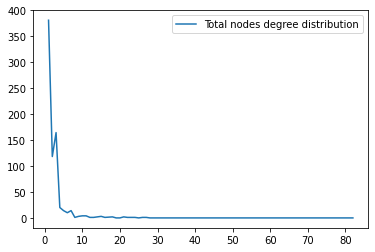

In [57]:
deg_dst_Graph(PAM_MU)
# similar to the actual Graph

#### Centralities

In [58]:
Degree_Centrality = nx.degree_centrality(GT)
#Nodes with high and low degree cenrailities
min_DC = {i for i in Degree_Centrality if Degree_Centrality[i]==min(Degree_Centrality.values())}
max_DC = {i for i in Degree_Centrality if Degree_Centrality[i]==max(Degree_Centrality.values())}
print("Nodes with high degree (", max(Degree_Centrality.values()),")centrality",max_DC,'\n\n Nodes with low degree(',min(Degree_Centrality.values()),') centrality', min_DC)

Nodes with high degree ( 0.08596713021491784 )centrality {'What If...?'} 

 Nodes with low degree( 0.0012642225031605564 ) centrality {'Dennis the Mailman', 'Billy Swan', 'Marc Spector', 'Master Hamir', 'Detective Costa', 'The Flaming Tuba', 'Griffin Sinclair', 'Dwayne Blaskowski', 'Hai-Qing Yang', 'Iwua', 'Ghost Rider', 'Mike on a Bike', 'Bryce', 'Sheikh Abdullah', 'Cull Obsidian', 'Fletcher Heggs', 'Liz', 'Guterman', 'Amy Minoru', 'Hernan Alvarez', 'Amalia Chavez', 'Ikaris', 'Dorothy', 'Mike Peterson', 'Colonel Victor Ramon', 'Master Guang Bo', 'MIT Assistant Vice Chancellor', 'Malekith', 'Tamar', 'Andrew Garner', 'Carlos', 'Herman', 'Carlo Eastman', 'Victoria Helstrom', 'Harold Meachum', 'Major Allen', 'Nico Minoru', 'Catherine Wilder', 'Eugene Patilio', 'Agent Fisher', 'Heinz Kruger', 'Flint', 'David Lieberman', 'Karun', 'Peter Parker3', 'Mama Donya', 'Topaz', 'Alpha Dog', 'Zaya Okonjo', 'Dr. Louise Hastings', 'Joseph Manfredi', 'Anton Ivanov', 'Col. Morty Bennett', 'Muneeba', 'Tib

In [59]:
EigenVector_Centrality = nx.eigenvector_centrality(GT, max_iter=500)
min_EV = {i for i in EigenVector_Centrality if EigenVector_Centrality[i]==min(EigenVector_Centrality.values())}
max_EV = {i for i in EigenVector_Centrality if EigenVector_Centrality[i]==max(EigenVector_Centrality.values())}
print("Nodes with high Eigen Vector(",max(EigenVector_Centrality.values()),") centrality",max_EV,'\n\n Nodes with low Eigen Vector(',min(EigenVector_Centrality.values()),') centrality', min_EV)

Nodes with high Eigen Vector( 0.3978133141936286 ) centrality {'Avengers: Endgame'} 

 Nodes with low Eigen Vector( 3.735516591936091e-27 ) centrality {'Billy Swan', 'Barasso', 'Ulysses Bloodstone', 'Verussa', 'Liorn', 'Jack Russell', 'Jovan', 'The Flaming Tuba', 'Azarel', 'Elsa Bloodstone', 'Ted (The Man-Thing)'}


In [60]:
#Katz_Centality = nx.katz_centrality(GT, max_iter=50000)
#min_KC = {i for i in Katz_Centality if Katz_Centality[i]==min(Katz_Centality.values())}
#max_KC = {i for i in Katz_Centality if Katz_Centality[i]==max(Katz_Centality.values())}
#print("Nodes with high Katz Centality", max_KC,'\n\n Nodes with low Katz_Centality', min_KC)

#Katz unable to find 50k iterations

In [61]:
PageRank= nx.pagerank(GT)
min_PR = {i for i in PageRank if PageRank[i]==min(PageRank.values())}
max_PR = {i for i in PageRank if PageRank[i]==max(PageRank.values())}
print("Nodes with high PageRank(",max(PageRank.values()),")", max_PR,'\n\n Nodes with low PageRank (',min(PageRank.values()),')', min_PR)

Nodes with high PageRank( 0.029512597741648154 ) {'Jessica Jones'} 

 Nodes with low PageRank ( 0.00041018220837406153 ) {'Eitri', 'Tiny', 'Cull Obsidian'}


In [62]:
Betweenness_Centrality=nx.betweenness_centrality(GT)
min_BC = {i for i in Betweenness_Centrality if Betweenness_Centrality[i]==min(Betweenness_Centrality.values())}
max_BC = {i for i in Betweenness_Centrality if Betweenness_Centrality[i]==max(Betweenness_Centrality.values())}
print("Nodes with high Betweenness(",max(Betweenness_Centrality.values()),") Centrality", max_BC,'\n\n Nodes with low Betweenness (', min(Betweenness_Centrality.values()),') Centrality', min_BC)

Nodes with high Betweenness( 0.21231554023902924 ) Centrality {'She-Hulk: Attorney at Law'} 

 Nodes with low Betweenness ( 0.0 ) Centrality {'Dennis the Mailman', 'Billy Swan', 'Marc Spector', 'Master Hamir', 'Detective Costa', 'The Flaming Tuba', 'Griffin Sinclair', 'Dwayne Blaskowski', 'Hai-Qing Yang', 'Iwua', 'Ghost Rider', 'Mike on a Bike', 'Bryce', 'Sheikh Abdullah', 'Cull Obsidian', 'Fletcher Heggs', 'Liz', 'Guterman', 'Amy Minoru', 'Hernan Alvarez', 'Amalia Chavez', 'Ikaris', 'Dorothy', 'Mike Peterson', 'Colonel Victor Ramon', 'Master Guang Bo', 'MIT Assistant Vice Chancellor', 'Malekith', 'Tamar', 'Andrew Garner', 'Carlos', 'Herman', 'Carlo Eastman', 'Victoria Helstrom', 'Harold Meachum', 'Major Allen', 'Nico Minoru', 'Catherine Wilder', 'Eugene Patilio', 'Agent Fisher', 'Heinz Kruger', 'Flint', 'David Lieberman', 'Karun', 'Peter Parker3', 'Mama Donya', 'Topaz', 'Alpha Dog', 'Zaya Okonjo', 'Dr. Louise Hastings', 'Joseph Manfredi', 'Anton Ivanov', 'Col. Morty Bennett', 'Muneeba

In [63]:
Closeness_Centrality = nx.closeness_centrality(GT)
min_CC = {i for i in Closeness_Centrality if Closeness_Centrality[i]==min(Closeness_Centrality.values())}
max_CC = {i for i in Closeness_Centrality if Closeness_Centrality[i]==max(Closeness_Centrality.values())}
print("Nodes with high Closeness(",max(Closeness_Centrality.values()),") Centrality", max_CC,'\n\n Nodes with low Closeness(',min(Closeness_Centrality.values()),') Centrality', min_CC)

Nodes with high Closeness( 0.23860900888419379 ) Centrality {'Avengers: Endgame'} 

 Nodes with low Closeness( 0.007284329661067968 ) Centrality {'Billy Swan', 'Barasso', 'Ulysses Bloodstone', 'Verussa', 'Liorn', 'Jack Russell', 'Jovan', 'The Flaming Tuba', 'Azarel', 'Elsa Bloodstone', 'Ted (The Man-Thing)'}


In [64]:
#Didn't get Katz Centrality value so ignoring it in Correlation Matrix
Cntrlts={0:list(Degree_Centrality.values()),1:list(EigenVector_Centrality.values()),
         2:list(PageRank.values()),3:list(Betweenness_Centrality.values()),
         4:list(Closeness_Centrality.values())}   
col_names = row_names = ['Degree Centrality', 'EigenVector Centrality',
                         'PageRank','Betweenness Centrality','Closeness Centrality']
matrix = np.empty((5, 5))
df = pd.DataFrame(matrix, columns=col_names, index=row_names)

for i in range(len(Cntrlts)):
    for j in range(len(Cntrlts)):
        x= stats.pearsonr(Cntrlts[i],Cntrlts[j])
        if i<=j: df.loc[row_names[i]][row_names[j]]=df.loc[row_names[j]][row_names[i]]=x.statistic
print(df)

                        Degree Centrality  EigenVector Centrality  PageRank  \
Degree Centrality                1.000000                0.596973  0.948512   
EigenVector Centrality           0.596973                1.000000  0.362849   
PageRank                         0.948512                0.362849  1.000000   
Betweenness Centrality           0.770177                0.489366  0.709718   
Closeness Centrality             0.231928                0.453987  0.118867   

                        Betweenness Centrality  Closeness Centrality  
Degree Centrality                     0.770177              0.231928  
EigenVector Centrality                0.489366              0.453987  
PageRank                              0.709718              0.118867  
Betweenness Centrality                1.000000              0.265963  
Closeness Centrality                  0.265963              1.000000  


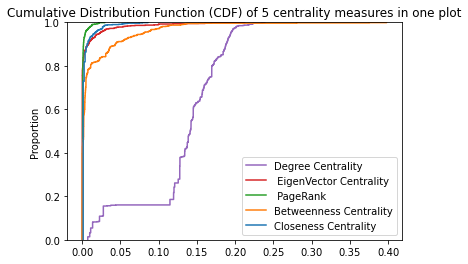

In [65]:
p = sns.ecdfplot(data=Cntrlts, legend=True)
p.set(title ="Cumulative Distribution Function (CDF) of 5 centrality measures in one plot")
p.legend(['Degree Centrality ',' EigenVector Centrality ',' PageRank','Betweenness Centrality','Closeness Centrality'], loc =4)